# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

***Perbandingan pergerakan Kurs Dollar (USD) terhadap Rupiah (IDR)***


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
from flask import Flask, render_template
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from bs4 import BeautifulSoup 
import requests

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:100]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:100])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tb


In [6]:
tr = table.find_all('tr')
tr[:10]

[<tr><td>7/8/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a></td></tr>,
 <tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr>,
 <tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr>,
 <tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr>,
 <tr><td>7/4/2022</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [7]:
td = table.find_all('td')
td[:10]

[<td>7/8/2022</td>,
 <td>Friday</td>,
 <td><a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a></td>,
 <td>7/7/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td>,
 <td>7/6/2022</td>,
 <td>Wednesday</td>]

In [8]:
a = table.find_all('a')
a[:10]

[<a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a>,
 <a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a>,
 <a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a>,
 <a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a>,
 <a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a>,
 <a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a>,
 <a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a>,
 <a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a>,
 <a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a>,
 <a href="/Rate/USD/IDR/7-4-2022">USD IDR rate for 7/4/2022</a>]

Do the scrapping process here (please change this markdown with your explanation)

In [9]:
temp = [] #initiating a tuple
        
for i in range(1, len(tr)):
    
    row = table.find_all(tr)[i]
    if len(row) == 4:

        #get date
        date = row.find_all('td')[0].text
        date = date.strip() #for removing the excess whitespace

        #get day
        day = row.find_all('td')[1].text
        day = day.strip() #for removing the excess whitespace
   
        #get value
        idr = row.find_all('td')[2].text
        idr = idr.strip() #for removing the excess whitespace
    
        #get note
        note = row.find_all('td')[3].text
        note = note.strip() #for removing the excess whitespace
 
    temp.append((date,idr)) 
    
temp

[('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5

In [10]:
temp = temp[::-1]
temp

[('1/10/2022', '14,290.15000 IDR'),
 ('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR'),
 ('1/17/2022', '14,331.25000 IDR'),
 ('1/18/2022', '14,358.70000 IDR'),
 ('1/19/2022', '14,362.85000 IDR'),
 ('1/20/2022', '14,327.60000 IDR'),
 ('1/21/2022', '14,329.75000 IDR'),
 ('1/24/2022', '14,350.70000 IDR'),
 ('1/25/2022', '14,330.55000 IDR'),
 ('1/26/2022', '14,366.45000 IDR'),
 ('1/27/2022', '14,395.00000 IDR'),
 ('1/28/2022', '14,383.40000 IDR'),
 ('1/31/2022', '14,339.40000 IDR'),
 ('2/1/2022', '14,328.30000 IDR'),
 ('2/2/2022', '14,355.35000 IDR'),
 ('2/3/2022', '14,387.00000 IDR'),
 ('2/4/2022', '14,400.70000 IDR'),
 ('2/7/2022', '14,394.90000 IDR'),
 ('2/8/2022', '14,386.75000 IDR'),
 ('2/9/2022', '14,334.30000 IDR'),
 ('2/10/2022', '14,357.00000 IDR'),
 ('2/11/2022', '14,344.75000 IDR'),
 ('2/14/2022', '14,303.45000 IDR'),
 ('2/15/2022', '14,265.45000 IDR'),
 ('2/16/2022', '14,274.45000 IDR'),

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
df = pd.DataFrame(temp, columns = ('date','idr'))
df.head()

,date,idr
0,1/10/2022,"14,290.15000 IDR"
1,1/11/2022,"14,284.46501 IDR"
2,1/12/2022,"14,298.95000 IDR"
3,1/13/2022,"14,309.00000 IDR"
4,1/14/2022,"14,314.55000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [12]:
df.dtypes

date    object
idr     object
dtype: object

In [13]:
df['date'] = df['date'].astype('datetime64')
df['idr'] = df['idr'].str.replace(" IDR","")
df['idr'] = df['idr'].str.replace(",","")
df['idr'] = df['idr'].astype('float64')

In [14]:
df.head()

,date,idr
0,2022-01-10,14290.15000
1,2022-01-11,14284.46501
2,2022-01-12,14298.95000
3,2022-01-13,14309.00000
4,2022-01-14,14314.55000


In [15]:
df.dtypes

date    datetime64[ns]
idr            float64
dtype: object

In [32]:
df=df.set_index('date')

In [16]:
df['wday']=df['date'].dt.day_name()
df

,date,idr,wday
0,2022-01-10,14290.15000,Monday
1,2022-01-11,14284.46501,Tuesday
2,2022-01-12,14298.95000,Wednesday
3,2022-01-13,14309.00000,Thursday
4,2022-01-14,14314.55000,Friday
...,...,...,...
124,2022-07-01,14975.15000,Friday
125,2022-07-04,14994.55000,Monday
126,2022-07-05,15014.65000,Tuesday
127,2022-07-06,14996.82520,Wednesday


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [17]:
df.head(3)

,date,idr,wday
0,2022-01-10,14290.15000,Monday
1,2022-01-11,14284.46501,Tuesday
2,2022-01-12,14298.95000,Wednesday


In [18]:
df.groupby("wday").mean().sort_values(by="idr", ascending=False)

,idr
wday,
Thursday,14494.678846
Friday,14482.264440
Tuesday,14478.857425
Monday,14477.706130
Wednesday,14474.974046


- Rata-rata pergerakan nilai dollar terhadap rupiah tertinggi berada di hari Kamis, sedangkan terendah berada pada hari 

In [19]:
df.groupby("wday").max().sort_values(by="idr", ascending=False).head(1)

,date,idr
wday,,
Tuesday,2022-07-05,15014.65


- Nilai dollar terhadap rupiah mencapai puncaknya pada tanggal 2022-07-05 dengan nilai sebesar IDR 15.014,65

In [20]:
df.groupby("wday").min().sort_values(by="idr", ascending=False).head(1)

,date,idr
wday,,
Friday,2022-01-14,14314.55


Nilai dollar terhadap rupiah mencapai puncaknya pada tanggal 2022-01-14 dengan nilai sebesar IDR 14.314,55

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

<AxesSubplot:xlabel='wday'>

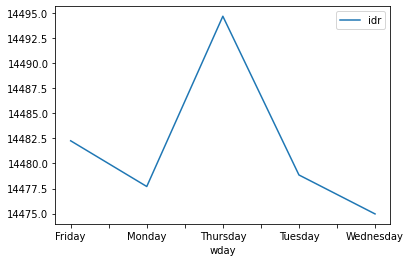

In [21]:
df.groupby('wday').mean().plot()

- Rata-rata pergerakan nilai dollar terhadap rupiah tertinggi berada di hari Kamis, sedangkan terendah berada pada hari Rabu 

In [22]:
df['yearmonth']=df['date'].dt.to_period('M')
df.head()

,date,idr,wday,yearmonth
0,2022-01-10,14290.15000,Monday,2022-01
1,2022-01-11,14284.46501,Tuesday,2022-01
2,2022-01-12,14298.95000,Wednesday,2022-01
3,2022-01-13,14309.00000,Thursday,2022-01
4,2022-01-14,14314.55000,Friday,2022-01


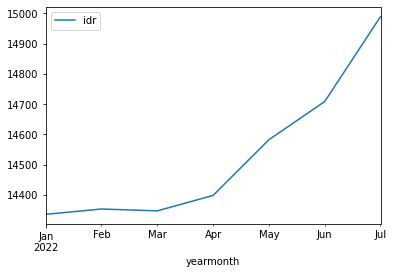

In [23]:
yearmonth = df.groupby('yearmonth').mean().plot()

- tren nilai dollar terhadap rupiah mengalami fluktuasi, namun memiliki kencenderungan terus meningkat dalam 7 bulan pertama (Jan to Jul) 2022